# Analyse de données des requêtes
Requêtes semaine 1, 2, 3, 4, 5 et 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pour l'analyse unidimensionnelle et multidimensionnelle : 
from math import sqrt, log
from pandas.plotting import scatter_matrix
from pyensae.graphhelper import Corrplot
from statsmodels.graphics.mosaicplot import mosaic

# pour la Factor-Analysis-of-Mixed-Data (FAMD) : 
from light_famd import FAMD
from sklearn.preprocessing import scale

#clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
#from scipy.cluster.hierarchy import dendrogram

# Chargement des données 

In [16]:
pwd

'C:\\Users\\evaet\\Documents\\5A\\defi_IA\\code\\request_data_analysis'

In [2]:
PATH = '../../data/results_requests/' 

In [23]:
# résultats requêtes 1, 2, 3, 4, 5 et 6
PATH1 = '../../data/results_requests/Week1/'
PATH2 = '../../data/results_requests/Week2/'
PATH3 = '../../data/results_requests/Week3/'
PATH4 = '../../data/results_requests/Week4/'
PATH5 = '../../data/results_requests/Week5/'
PATH6 = '../../data/results_requests/Week6/'

data = pd.DataFrame()
files_name = ['result' + str(i) + '.csv' for i in range(1,13)]
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH1+file)],ignore_index=True)

files_name = ['result' + str(i) + '.csv' for i in range(13,17)]
data = pd.DataFrame()
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH2+file)],ignore_index=True)

files_name = ['result' + str(i) + '.csv' for i in range(17,20)]
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH3+file)],ignore_index=True)
    
files_name = ['result' + str(i) + '.csv' for i in range(20,23)]
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH4+file)],ignore_index=True)
    
files_name = ['result' + str(i) + '.csv' for i in range(23,25)]
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH5+file)],ignore_index=True)

files_name = ['result' + str(i) + '.csv' for i in range(25,27)]
for file in files_name : 
    data = pd.concat([data,pd.read_csv(PATH6+file)],ignore_index=True)
      
data.to_csv(PATH+'requetes_total.csv',index=False)

In [34]:
# requêtes réalisées 
PATH1 = '../../data/stock_requetes/'

data_1_4 = pd.DataFrame()
files_name = ['data_requests' + str(i) + '.csv' for i in range(1,4)]
for file in files_name : 
    data_1_4 = pd.concat([data_1_4,pd.read_csv(PATH1+file)],ignore_index=True)
    
data_1 = pd.DataFrame()
files_name = ['data_requests' + str(i) + '.csv' for i in range(4,6)]
for file in files_name : 
    data_1 = pd.concat([data_1,pd.read_csv(PATH1+file)],ignore_index=True)

data_1_4.to_csv(PATH1+'data_requests_total_1_4.csv',index=False)
data_1.to_csv(PATH1+'data_requests_total_1.csv',index=False)

In [6]:
# ajouter les features des hôtels : 
features_hotels = pd.read_csv(PATH+'features_hotels.csv')

# take hotels in the order in which they are found in the request dataset and concatenate the two dataframes
hotels_in_order = features_hotels.loc[data['hotel_id']]

# check that the city between the two dataframes are matching : 
cities_in_order = np.array(hotels_in_order['hotel_id'])
cities_request = np.array(data['hotel_id'])
diff_cities = len(np.where(cities_in_order!=cities_request)[0])

# if cities are the same we can delete one of the columns :
if diff_cities == 0 : 
    hotels_in_order.drop('city',axis=1,inplace=True)    
print("nombre de requetes pour lesquelles la ville de l'hotel ne matche pas avec la ville demandée : ",diff_cities)

# finally we concatenate the two dataframes:
hotels_in_order.drop('hotel_id',axis=1,inplace=True)
hotels_in_order.reset_index(inplace=True)
data = pd.concat([data,hotels_in_order],axis=1)
data.drop('index',axis=1,inplace=True)
data.to_csv(PATH+'requetes_total.csv',index=False)
data.head()

nombre de requetes pour lesquelles la ville de l'hotel ne matche pas avec la ville demandée :  0


,avatar_id,city,date,language,mobile,hotel_id,price,stock,group,brand,parking,pool,children_policy,group,brand,parking,pool,children_policy
0,29822,madrid,2,bulgarian,0,127,69,0,Independant,Independant,1,0,0,Independant,Independant,1,0,0
1,29822,madrid,2,bulgarian,0,941,67,0,Independant,Independant,1,0,0,Independant,Independant,1,0,0
2,29822,madrid,2,bulgarian,0,186,129,0,Yin Yang,Ardisson,1,0,0,Yin Yang,Ardisson,1,0,0
3,29822,madrid,2,bulgarian,0,633,148,2,Morriott International,CourtYord,0,0,0,Morriott International,CourtYord,0,0,0
4,29822,madrid,2,bulgarian,0,241,126,0,Boss Western,J.Halliday Inn,1,0,0,Boss Western,J.Halliday Inn,1,0,0


In [6]:
# définition des variables quntitatives et qualitatives : 
var_quant = ["date","price","stock"]
var_quali = ["city","language", "mobile","group","brand","parking","pool","children_policy"]

In [7]:
# Transform the dataset with the correct types : 
for var in var_quali :
    data[var]=pd.Categorical(data[var],ordered=False)

data.dtypes

avatar_id             int64
city               category
date                  int64
language           category
mobile             category
hotel_id              int64
price                 int64
stock                 int64
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

In [8]:
data.describe()

,avatar_id,date,hotel_id,price,stock
count,214261.000000,214261.000000,214261.000000,214261.000000,214261.000000
mean,53706.051251,21.992126,500.555845,153.704949,44.329113
std,18886.550407,12.514022,287.833556,75.504341,51.310665
min,29703.000000,0.000000,0.000000,38.000000,0.000000
25%,29961.000000,11.000000,252.000000,96.000000,7.000000
50%,68549.000000,22.000000,504.000000,139.000000,26.000000
75%,68737.000000,33.000000,749.000000,190.000000,64.000000
max,68936.000000,43.000000,998.000000,538.000000,269.000000


# Exploration unidimensionnelle

## variables quantitatives 

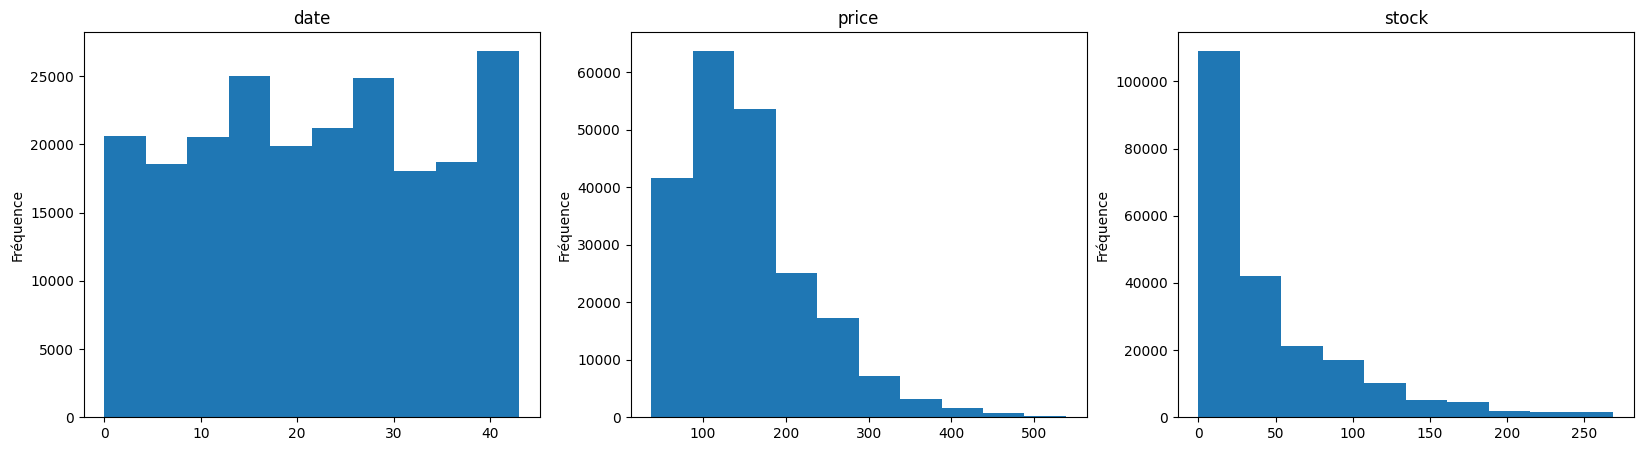

In [9]:
fig = plt.figure(figsize=(20, 5))

for i in range(0,len(var_quant)):
    plt.subplot(1, 3, i+1)
    plt.hist(data[var_quant[i]])
    plt.title(var_quant[i])
    plt.ylabel('Fréquence')
plt.show()
plt.close()

Commentaires : 
- price et stock suivent une distribution exponentielle => on va donc pouvoir leur appliquer une transformation **log** pour les recentrer. Le problème c'est que stock a une masse en zero, donc on va plutôt lui appliquer du sqrt.
- date a une répartition assez uniforme de 0 à 44 => bon point pour la manière donc on a fait les requêtes

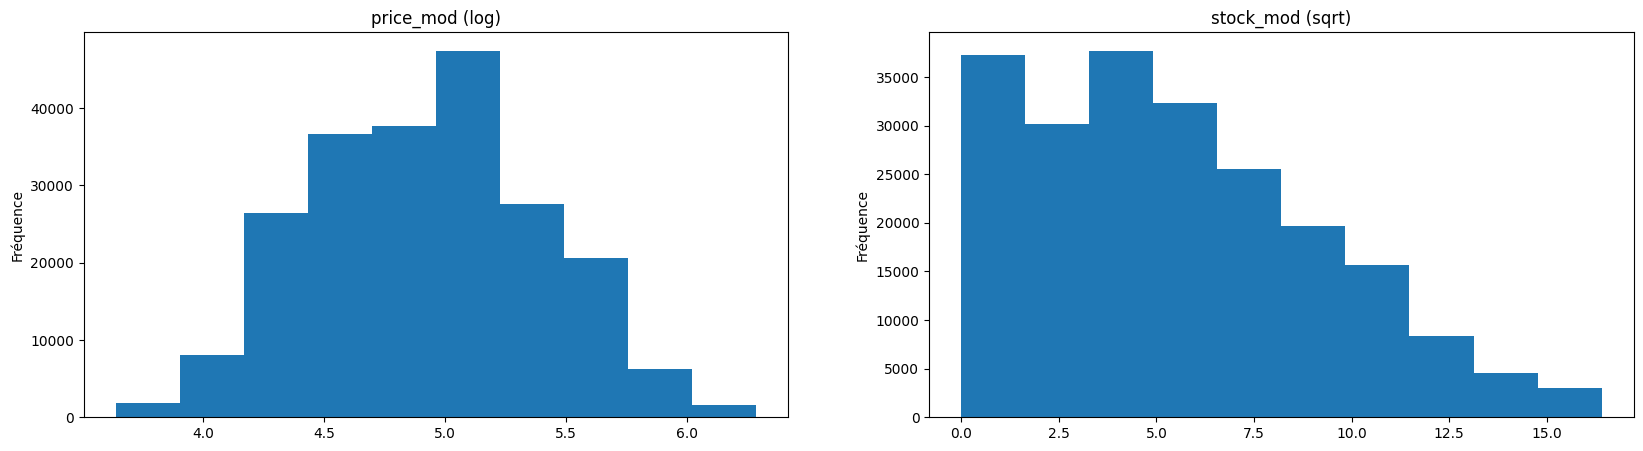

In [10]:
# transformation : 
data["price_mod"]=data["price"].map(lambda x: log(x))
data["stock_mod"]=data["stock"].map(lambda x: sqrt(x))

# on vérifie l'aspect de la nouvelle distribution : 
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(data["price_mod"])
plt.title("price_mod (log)")
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)
plt.hist(data["stock_mod"])
plt.title("stock_mod (sqrt)")
plt.ylabel('Fréquence')
plt.show()
plt.close()

In [11]:
data_mod = data.drop(["price","stock"],axis=1)
data_mod.to_csv(PATH+"requetes_total_mod.csv",index=False)
var_quant = ["date","price_mod","stock_mod"]

## Variables qualitatives

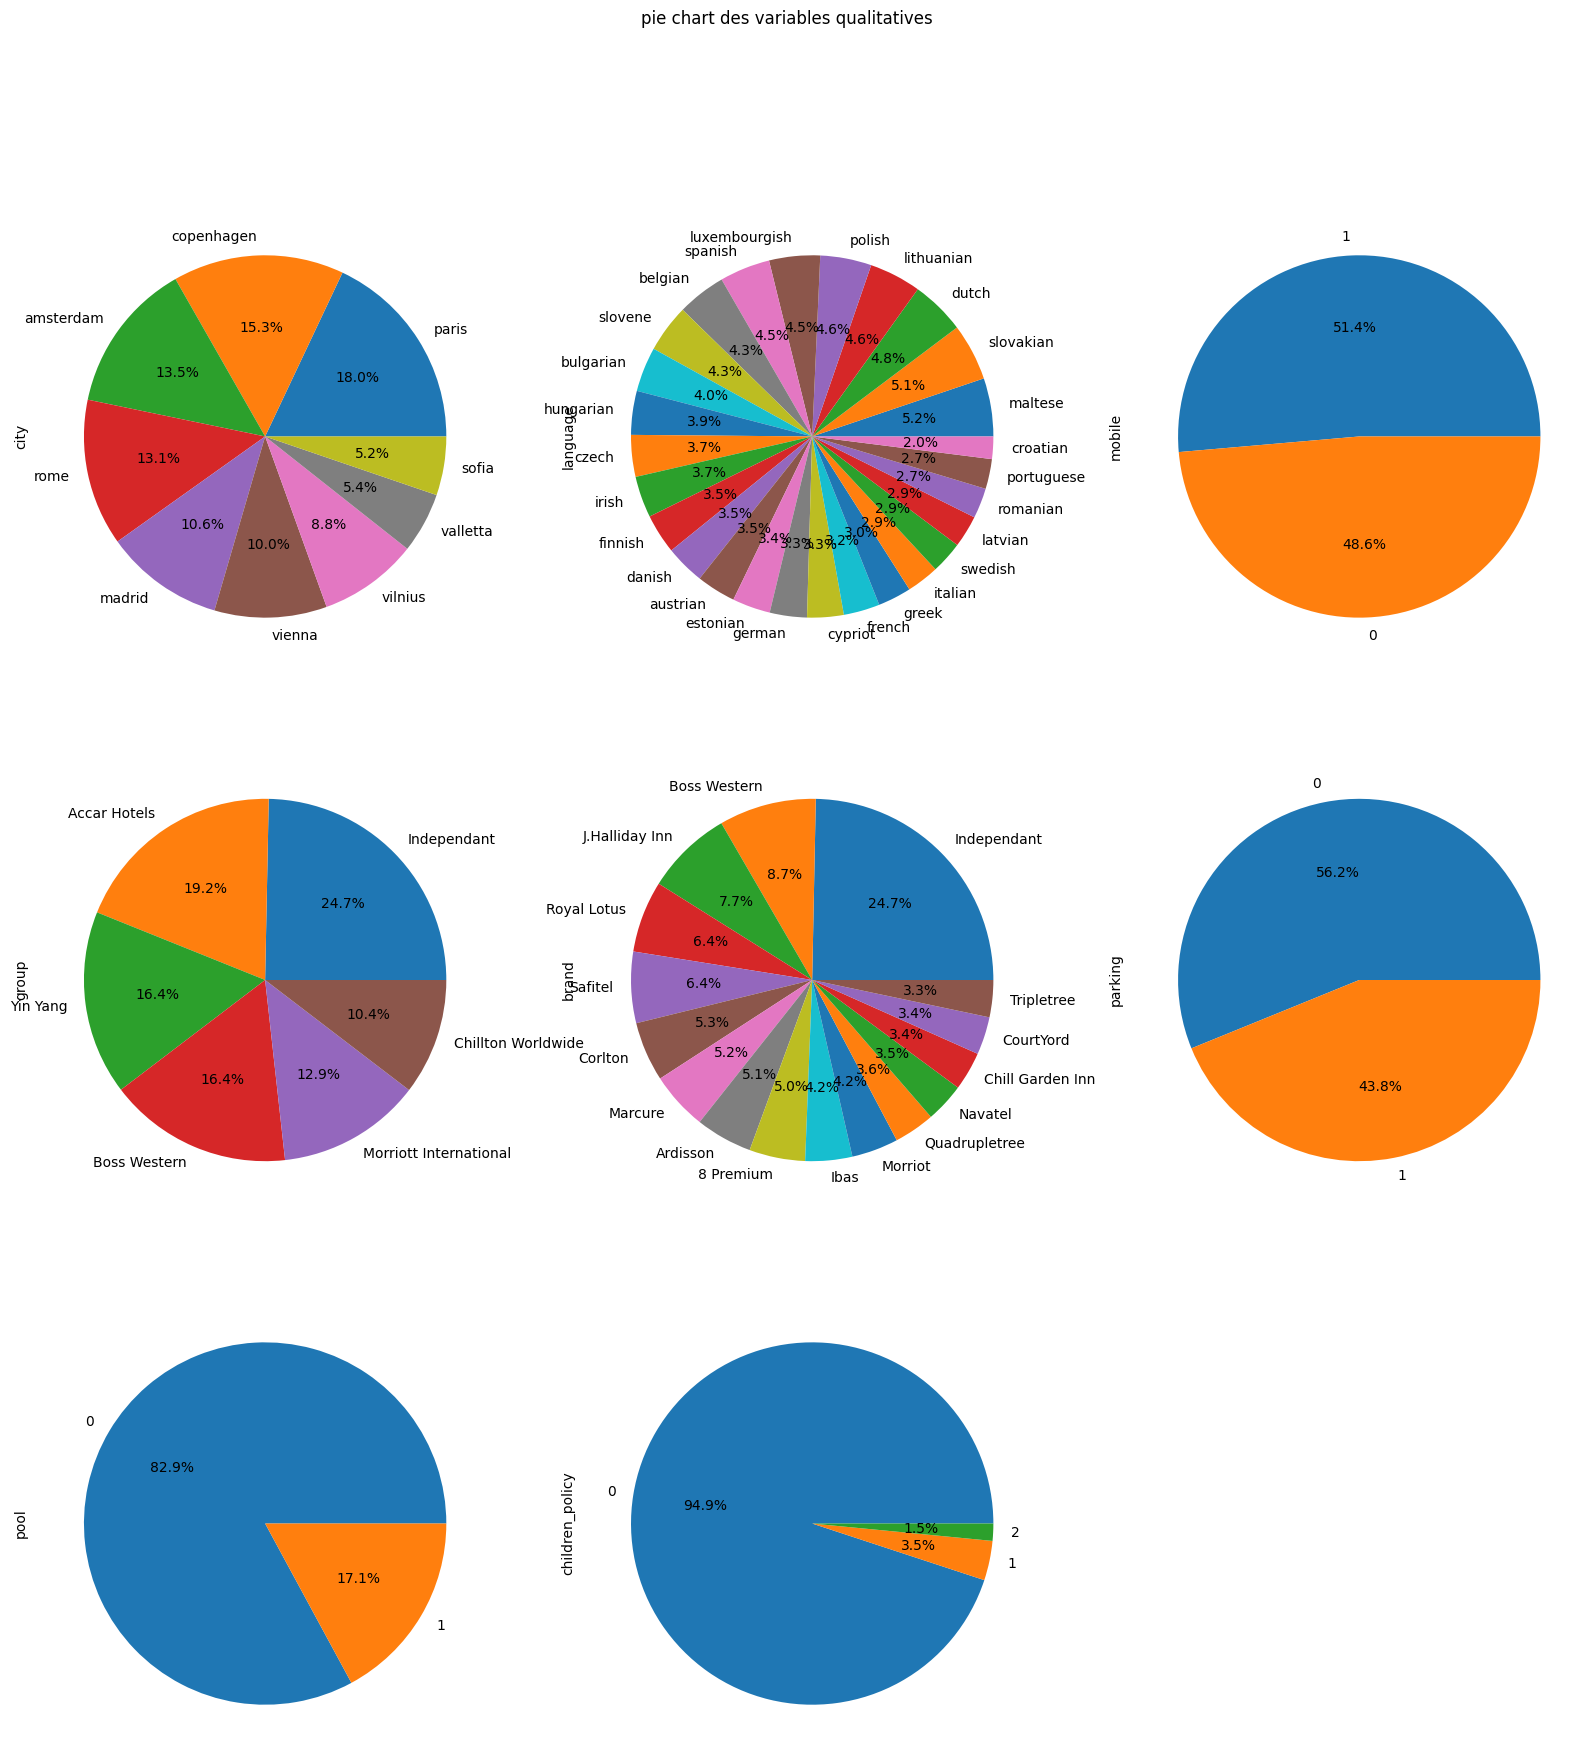

In [12]:
fig = plt.figure(figsize=(20, 20))
i = 1
for var in var_quali : 
    plt.subplot(3, 3, i)
    data_mod[var].value_counts().plot.pie(subplots=True, title="pie chart des variables qualitatives", autopct='%1.1f%%')
    i+=1

# Exploration multidimensionnelle

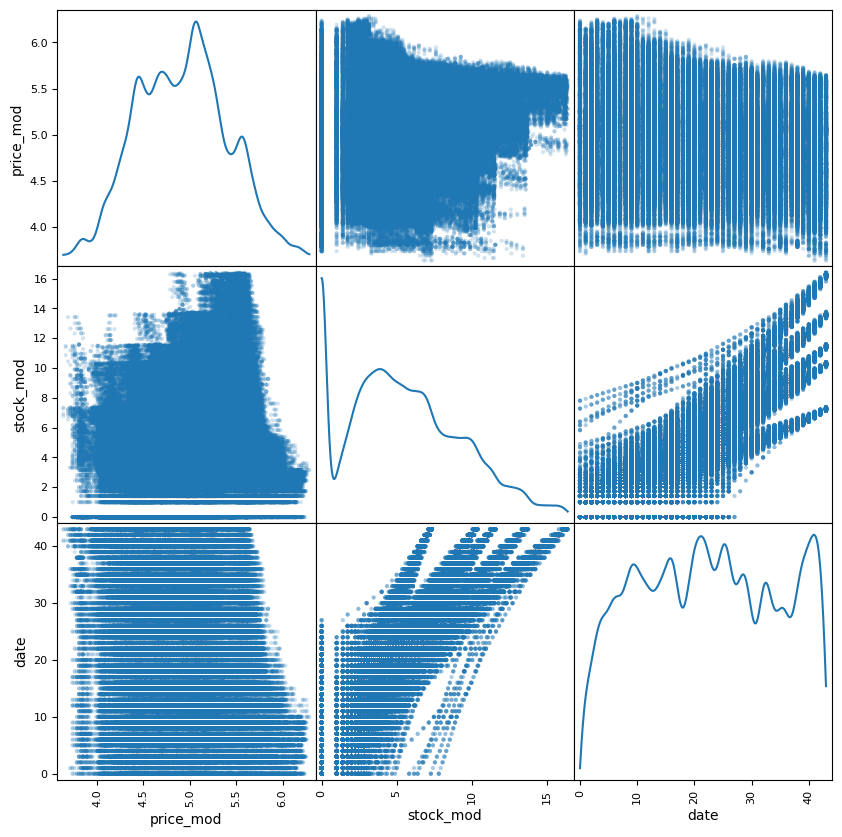

In [15]:
scatter_matrix(data_mod[['price_mod','stock_mod','date']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

/home/julie/anaconda3/lib/python3.8/site-packages/pyensae/graphhelper/linkage.py:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = linkage(D, method=method, metric=metric)


<AxesSubplot: >

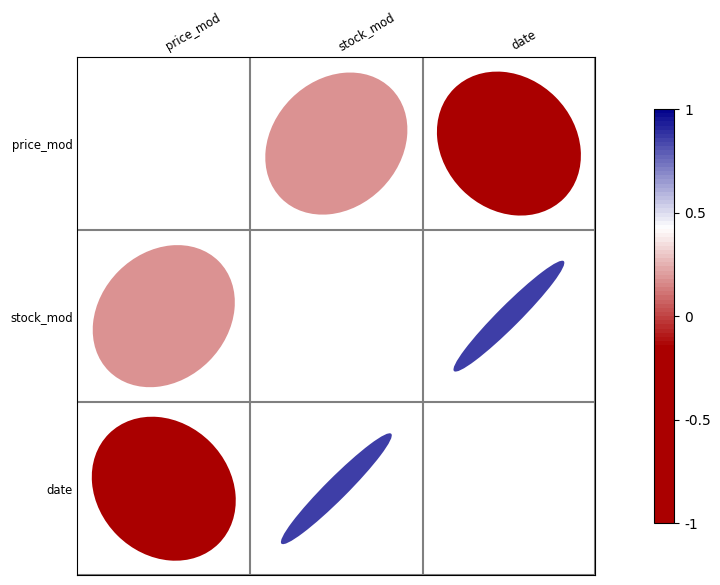

In [16]:
c = Corrplot(data_mod[['price_mod','stock_mod','date']])
c.plot(figsize=(12,6))

# Analyse des requêtes doublons 

In [37]:
requests_1 = pd.read_csv(PATH1+'data_requests_total_1.csv') 
requests_1_4 = pd.read_csv(PATH1+'data_requests_total_1_4.csv') 

In [38]:
# Cas où il existe plusieurs requêtes pour un utilisateur
requests_1_4

,avatar_name,language,city,date,mobile
0,first_avatar,dutch,paris,40,0
1,first_avatar,dutch,paris,32,0
2,first_avatar,dutch,paris,19,1
3,turtles1,luxembourgish,copenhagen,18,0
4,turtles1,luxembourgish,copenhagen,17,0
...,...,...,...,...,...
5342,turtles2094,italian,rome,1,1
5343,turtles2097,italian,paris,33,0
5344,turtles2097,italian,paris,16,1
5345,turtles2097,italian,paris,8,0


In [60]:
# Cas où il existe une seule requête par utilisateur
tmp = requests[["language", "city", "date", "mobile"]]

# On compte le nb de doublons en semaine 6
tmp1 = tmp.drop_duplicates()
print("On compte : " + str(len(tmp)-len(tmp1)) + " doublons")
ind_duplicates = (np.where(tmp.duplicated()==True)[0])
duplicates = tmp.iloc[ind_duplicates]

On compte : 861 doublons


In [61]:
duplicates

,language,city,date,mobile
34,luxembourgish,amsterdam,0,1
92,greek,valletta,37,1
141,lithuanian,paris,23,1
190,german,vienna,0,1
215,maltese,rome,9,1
...,...,...,...,...
6331,czech,rome,22,1
6334,cypriot,valletta,11,1
6338,croatian,vienna,33,1
6342,finnish,rome,39,1


In [62]:
# Fonction pour enlever les doublons dans les stock requetes 
# => modifier la fonction génératrice de requetes pour enlever les requetes deja realiser? 
# voir comment on a bien balayé l'espace